In [136]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf  
from sklearn.preprocessing import OneHotEncoder

In [137]:
data = pd.read_json("combined_data_new.json")

In [ ]:
# all rows 
pd.set_option('display.max_rows', None)

data.info()

In [138]:
data['Loyalty_Program_Data'] = data['Loyalty_Program_Data'].astype(int) #  bool to interger 

In [139]:
data['Is_Modern_Trade'] = data['Is_Modern_Trade'].astype(int)

In [140]:
cols = ['Online_Sales_Availability','Sampling_Interest','Marketing_Materials_Availability','Consumer_Engagement_Programs','Brand_Collaborations','Compliance_with_Regulations']

for col in cols:
    data[col] = data[col].astype(int)

In [6]:
drop_columns=['Store_ID', 'Brand_ID', 'Product_ID', 'Bestselling_Products', 'Company_Website','Product_Dimensions']

In [ ]:
data.head()

In [141]:
data[['length', 'width', 'height']] = data['Product_Dimensions'].str.split('x', expand=True)


In [142]:
categorical_cols = ['Store_Format', 'Age_Distribution', 'Education_Levels', 'Occupation_Types', 'Purchase_Patterns_x',
                    'Dominating business type', 'Store_Category_x', 'Target_Audience', 'Headquarters_Location',
                    'Product_Category', 'Product_Sub_Category', 'Seasonality', 'Ideal_Store_Types',
                    'Store_Category_y', 'Purchase_Patterns_y', 'Social_Media_Presence', 'Advertising_Channels',
                    'Product_Pipeline', 'Customer_Support_Services', 'Bestselling_Products', 'Sampling_Interest', 
                    'Certifications_Awards', 'Promotional_Budget','Special_Requirements', 'Geographical_Coverage']


In [143]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [144]:
data['Store_Format'] = le.fit_transform(data['Store_Format']) #Counter Top', 'Walk-in

In [145]:
print(data['Headquarters_Location'].unique())

['Sparkschester' 'Bassshire' 'Lake Rachelland' 'Johnborough'
 'Brownchester' 'Hernandezfurt']


In [147]:
print(data['Headquarters_Location'].unique())
data['Headquarters_Location'] = le.fit_transform(data['Headquarters_Location'])



[5 0 4 3 1 2]


In [148]:
print(data['Age_Distribution'].unique()) # ['<18', '40-60', '18-25', '25-40', '>60']
data['Age_Distribution'] = le.fit_transform(data['Age_Distribution']) #[3 2 0 1 4]

In [149]:
print(data['Dominating business type'].unique())  #['Restraunts', 'Retail', 'Clothing', 'Healthcare', 'F&B']
data['Dominating business type'] = le.fit_transform(data['Dominating business type']) #[3, 4, 0, 2, 1]

['F&B' 'Restraunts' 'Clothing' 'Healthcare' 'Retail']


In [150]:
print(data['Store_Category_x'].unique() )# ['Confectionary', 'Medical', 'Daily Needs', 'Bakery', 'Paan Store','Grocery']
data['Store_Category_x'] = le.fit_transform(data['Store_Category_x']) # ([1, 4, 2, 0, 5, 3])

['Daily Needs' 'Grocery' 'Medical' 'Confectionary' 'Paan Store' 'Bakery']


In [151]:
print(data['Target_Audience'].unique())
data['Target_Audience'] = le.fit_transform(data['Target_Audience']) # [0, 3, 1, 2])

['Seniors' 'All' 'Adults']


In [152]:
data['Headquarters_Location'].unique()

array([5, 0, 4, 3, 1, 2])

In [85]:
data['Bestselling_Products'].unique()

array(['admit', 'rest', 'down', 'financial', 'final', 'color'],
      dtype=object)

In [ ]:
data.info()

In [154]:
print(data['Product_Sub_Category'].unique())

data['Product_Sub_Category'] = le.fit_transform(data['Product_Sub_Category'])


'''
['Nutraceuticals' 'Tea & Coffee' 'Bakery and confectionary products'
 'Pet Food']

 [1 3 0 2]


'''

[1 3 0 2]


"\n['Nutraceuticals' 'Tea & Coffee' 'Bakery and confectionary products'\n 'Pet Food']\n\n"

In [156]:
print(data['Special_Requirements'].unique())
# ['Fragile' 'Refrigeration' 'None']
data['Special_Requirements'] = le.fit_transform(data['Special_Requirements']) # [0 2 1]


[0 2 1]


In [158]:
print(data['Product_Category'].unique()) #['Food' 'Beverages' 'Others']
data['Product_Category'] = le.fit_transform(data['Product_Category']) # [1 0 2]

[1 0 2]


In [23]:
data['len']

,Store_ID,Brand_IDs,Location_Score,Store_Area,Store_Age,Store_Review_Among_Sales_People,Store_Review,Overall_Sales_Data GST score,Store_Format,Operating_Hours,...,Social_Media_Presence,Consumer_Engagement_Programs,Brand_Collaborations,Advertising_Channels,Certifications_Awards,Company_Website,Customer_Reviews_Ratings,Compliance_with_Regulations,Product_Pipeline,Customer_Support_Services
0,cf237471-0781-48dc-9082-0892d90144cf,d17ff46c-f958-43e3-aefe-6149fb84ac30,4.380783,2071,13,4.614771,4.611630,2,0,20,...,High,1,0,Print,Organic,http://www.walker.com/,3.954743,0,Yes,Email
1,63143b60-8650-4472-9db4-28ddf9f52cd9,d17ff46c-f958-43e3-aefe-6149fb84ac30,1.041124,4330,20,1.702907,1.312858,3,1,13,...,High,1,0,Print,Organic,http://www.walker.com/,3.954743,0,Yes,Email
2,f2c6a624-2f9c-43b5-9dd7-3bc531152998,d17ff46c-f958-43e3-aefe-6149fb84ac30,3.801751,3739,1,3.348931,4.818411,4,1,19,...,High,1,0,Print,Organic,http://www.walker.com/,3.954743,0,Yes,Email
3,74f1dd03-75aa-476a-a980-95e91a95617d,d17ff46c-f958-43e3-aefe-6149fb84ac30,2.191860,3813,17,1.110293,3.192973,2,0,14,...,High,1,0,Print,Organic,http://www.walker.com/,3.954743,0,Yes,Email
4,f2c518c4-0f48-434a-aee2-dd6d1593d80c,d17ff46c-f958-43e3-aefe-6149fb84ac30,2.635669,2699,14,4.981856,1.400239,2,1,23,...,High,1,0,Print,Organic,http://www.walker.com/,3.954743,0,Yes,Email


In [159]:
data['length'] = data['length'].astype(float)

In [160]:
data['height'] = data['height'].astype(float)

In [161]:
data['width'] = data['width'].astype(float)

In [163]:
print(data['Ideal_Store_Types'].unique())

# ['Specialty Stores' 'Supermarkets']
data['Ideal_Store_Types'] = le.fit_transform(data['Ideal_Store_Types'])# [0 1]

[0 1]


In [165]:
print(data['Seasonality'].unique()) # ['Winter' 'Summer']
data['Seasonality'] = le.fit_transform(data['Seasonality']) # [1,0]

[1 0]


In [166]:
data['Special_Requirements'] = le.fit_transform(data['Special_Requirements'])  # ['Refrigeration' 'Fragile' 'None']
data['Ideal_Store_Types'] = le.fit_transform(data['Ideal_Store_Types'])  # ['Convenience Stores' 'Specialty Stores' 'Supermarkets']
data['Geographical_Coverage'] = le.fit_transform(data['Geographical_Coverage'])  # ['Regional' 'Local' 'National']
data['Store_Category_y'] = le.fit_transform(data['Store_Category_y'])  # ['Dairy' 'Grocery' 'Chemist']
data['Purchase_Patterns_y'] = le.fit_transform(data['Purchase_Patterns_y'])  # ['Impulse' 'One-time' 'Regular' 'Seasonal']
data['Social_Media_Presence'] = le.fit_transform(data['Social_Media_Presence'])  # ['High' 'Medium' 'Low']
data['Advertising_Channels'] = le.fit_transform(data['Advertising_Channels'])  # ['Print' 'Social Media' 'Online Ads']
data['Certifications_Awards'] = le.fit_transform(data['Certifications_Awards'])  # ['Organic' 'Fair Trade' 'None']
data['Product_Pipeline'] = le.fit_transform(data['Product_Pipeline'])  # ['Yes' 'No']
data['Customer_Support_Services'] = le.fit_transform(data['Customer_Support_Services'])  # ['Email' 'Online Chat' 'Phone']

In [167]:
print(data['Special_Requirements'].unique())
print(data['Ideal_Store_Types'].unique())
print(data['Geographical_Coverage'].unique())
print(data['Store_Category_y'].unique())
print(data['Purchase_Patterns_y'].unique())
print(data['Social_Media_Presence'].unique())
print(data['Advertising_Channels'].unique())
print(data['Certifications_Awards'].unique())
print(data['Product_Pipeline'].unique())
print(data['Customer_Support_Services'].unique())

'''
[0 2 1]
[0 1]
[0 1]
[1 0]
[0 2 1]
[0 2 1]
[1 0 2]
[1 0]
[1 0]
[1 0]
'''

[0 2 1]
[0 1]
[0 1]
[1 0]
[0 2 1]
[0 2 1]
[1 0 2]
[1 0]
[1 0]
[1 0]


'\n[1 0 2]\n[0 1]\n[2 1 0]\n[1 0 2]\n[1 3 0 2]\n[1 0]\n[2 1 0]\n[0 2 1]\n[0 1]\n[2 0 1]\n'

In [ ]:
# get all the columns whose type is object 
for col in data.columns:
    if data[col].dtypes == 'object': 
            print("col",col,"unique" ,data[col].unique())

In [101]:
drop_columns=['Bestselling_Products','Company_Website','Product_Dimensions']

data = data.drop(drop_columns, axis=1)

In [33]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



In [169]:
print(data['Purchase_Patterns_x'].unique()) # ['Regular' 'Seasonal' 'One-time'] #[1 2 0]]
data['Purchase_Patterns_x'] = le.fit_transform(data['Purchase_Patterns_x'])

[1 2 0]


In [171]:
print(data['Occupation_Types'].unique())  # ['Salaried' 'Self-Employeed' 'Farmer']
data['Occupation_Types'] = le.fit_transform(data['Occupation_Types']) #[1 2 0]

[1 2 0]


In [173]:
print(data['Education_Levels'].unique()) # ['High School' 'Bachelor' 'PhD' 'Master']
data['Education_Levels'] = le.fit_transform(data['Education_Levels']) #[1 0 3 2]

[1 0 3 2]


In [174]:

data['Store_Format'] = le.fit_transform(data['Store_Format'])


In [ ]:
print(data.head())
print(data.columns)

In [175]:
data['Compliance_with_Regulations'].unique()

array([1, 0])

In [ ]:
data.info()

In [42]:
data.to_excel("combined_data.xlsx", index=False)

In [39]:
import joblib
from sklearn.ensemble import GradientBoostingClassifier 
import sklearn.ensemble._gb_losses 
from sklearn.metrics import accuracy_score, classification_report

In [63]:
store_counts = data.groupby('Store_ID')['Brand_ID'].nunique().reset_index()
#store_counts.columns = ['Store_ID', 'Store_Count']

store_counts

,Store_ID,Brand_ID
0,002e53b4-26a9-40ab-8a2d-85eafd893ecc,4
1,085a372d-3c4c-4e4b-b5de-2253a89ca9af,4
2,0a253e59-c6ca-461a-accd-250e75278fa0,1
3,0dfd6681-6150-42fa-a286-f28819d1d1ab,3
4,0ed47177-1548-4106-834d-4c3c7627348e,4
...,...,...
95,f2c6a624-2f9c-43b5-9dd7-3bc531152998,5
96,f7783e31-f8be-4c5d-88ba-5a2578e239a6,1
97,fc403c1c-109b-4dc7-9560-49eed2e8dfe1,4
98,fde2d8c6-96a5-4545-8a94-bf45cb85d7b2,2


In [47]:
store_counts

,Store_ID,counts
0,002e53b4-26a9-40ab-8a2d-85eafd893ecc,4
1,085a372d-3c4c-4e4b-b5de-2253a89ca9af,4
2,0a253e59-c6ca-461a-accd-250e75278fa0,1
3,0dfd6681-6150-42fa-a286-f28819d1d1ab,3
4,0ed47177-1548-4106-834d-4c3c7627348e,4
...,...,...
95,f2c6a624-2f9c-43b5-9dd7-3bc531152998,5
96,f7783e31-f8be-4c5d-88ba-5a2578e239a6,1
97,fc403c1c-109b-4dc7-9560-49eed2e8dfe1,4
98,fde2d8c6-96a5-4545-8a94-bf45cb85d7b2,2


In [49]:
data['Brand_ID']

0      d17ff46c-f958-43e3-aefe-6149fb84ac30
1      d17ff46c-f958-43e3-aefe-6149fb84ac30
2      d17ff46c-f958-43e3-aefe-6149fb84ac30
3      d17ff46c-f958-43e3-aefe-6149fb84ac30
4      d17ff46c-f958-43e3-aefe-6149fb84ac30
                       ...                 
336    55bb502c-2e10-4eab-8f95-a3d45df37919
337    f852ad95-cdca-4a77-a911-f7c0419653cb
338    f852ad95-cdca-4a77-a911-f7c0419653cb
339    5fa8a652-157e-4073-9384-1ff64415c1e0
340    bdac00ff-19de-455d-802b-56401eaf2403
Name: Brand_ID, Length: 341, dtype: object

In [60]:

data_dummy = data.merge(store_counts, on='Store_ID',how='left')
data_dummy

,Store_ID,Brand_IDs,Location_Score,Store_Area,Store_Age,Store_Review_Among_Sales_People,Store_Review,Overall_Sales_Data GST score,Store_Format,Operating_Hours,...,Advertising_Channels,Certifications_Awards,Customer_Reviews_Ratings,Compliance_with_Regulations,Product_Pipeline,Customer_Support_Services,length,width,height,Store_Count
0,cf237471-0781-48dc-9082-0892d90144cf,d17ff46c-f958-43e3-aefe-6149fb84ac30,4.380783,2071,13,4.614771,4.611630,2,0,20,...,1,2,3.954743,0,1,0,85.0,59.0,96.0,2
1,63143b60-8650-4472-9db4-28ddf9f52cd9,d17ff46c-f958-43e3-aefe-6149fb84ac30,1.041124,4330,20,1.702907,1.312858,3,1,13,...,1,2,3.954743,0,1,0,85.0,59.0,96.0,5
2,f2c6a624-2f9c-43b5-9dd7-3bc531152998,d17ff46c-f958-43e3-aefe-6149fb84ac30,3.801751,3739,1,3.348931,4.818411,4,1,19,...,1,2,3.954743,0,1,0,85.0,59.0,96.0,5
3,74f1dd03-75aa-476a-a980-95e91a95617d,d17ff46c-f958-43e3-aefe-6149fb84ac30,2.191860,3813,17,1.110293,3.192973,2,0,14,...,1,2,3.954743,0,1,0,85.0,59.0,96.0,5
4,f2c518c4-0f48-434a-aee2-dd6d1593d80c,d17ff46c-f958-43e3-aefe-6149fb84ac30,2.635669,2699,14,4.981856,1.400239,2,1,23,...,1,2,3.954743,0,1,0,85.0,59.0,96.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,c8adac95-a6b6-4874-b447-eb8850c56c45,55bb502c-2e10-4eab-8f95-a3d45df37919,1.520054,4509,11,3.820329,3.731840,5,1,17,...,1,1,0.073404,1,0,1,93.0,86.0,38.0,5
337,9012763b-16f2-4525-91a6-8d460b97db90,f852ad95-cdca-4a77-a911-f7c0419653cb,4.634358,1846,5,0.576449,1.377139,5,0,24,...,1,2,0.912553,0,0,2,10.0,43.0,62.0,1
338,aa924292-b1cd-4008-97eb-b89c22b56bac,f852ad95-cdca-4a77-a911-f7c0419653cb,4.551238,1654,16,1.114964,1.233445,5,1,10,...,1,2,0.912553,0,0,2,10.0,43.0,62.0,3
339,0a253e59-c6ca-461a-accd-250e75278fa0,5fa8a652-157e-4073-9384-1ff64415c1e0,2.200245,4105,19,4.019526,4.696772,0,0,8,...,1,1,1.312669,1,0,2,89.0,76.0,23.0,1


In [61]:
data_dummy.head()

,Store_ID,Brand_IDs,Location_Score,Store_Area,Store_Age,Store_Review_Among_Sales_People,Store_Review,Overall_Sales_Data GST score,Store_Format,Operating_Hours,...,Advertising_Channels,Certifications_Awards,Customer_Reviews_Ratings,Compliance_with_Regulations,Product_Pipeline,Customer_Support_Services,length,width,height,Store_Count
0,cf237471-0781-48dc-9082-0892d90144cf,d17ff46c-f958-43e3-aefe-6149fb84ac30,4.380783,2071,13,4.614771,4.611630,2,0,20,...,1,2,3.954743,0,1,0,85.0,59.0,96.0,2
1,63143b60-8650-4472-9db4-28ddf9f52cd9,d17ff46c-f958-43e3-aefe-6149fb84ac30,1.041124,4330,20,1.702907,1.312858,3,1,13,...,1,2,3.954743,0,1,0,85.0,59.0,96.0,5
2,f2c6a624-2f9c-43b5-9dd7-3bc531152998,d17ff46c-f958-43e3-aefe-6149fb84ac30,3.801751,3739,1,3.348931,4.818411,4,1,19,...,1,2,3.954743,0,1,0,85.0,59.0,96.0,5
3,74f1dd03-75aa-476a-a980-95e91a95617d,d17ff46c-f958-43e3-aefe-6149fb84ac30,2.191860,3813,17,1.110293,3.192973,2,0,14,...,1,2,3.954743,0,1,0,85.0,59.0,96.0,5
4,f2c518c4-0f48-434a-aee2-dd6d1593d80c,d17ff46c-f958-43e3-aefe-6149fb84ac30,2.635669,2699,14,4.981856,1.400239,2,1,23,...,1,2,3.954743,0,1,0,85.0,59.0,96.0,3


In [ ]:
data_dummy.head

In [176]:
information_ids_str = {
    'Store_ID' : data['Store_ID'],
    'Brand_IDs' : data['Brand_IDs'],
    'Product_ID' : data['Product_ID'],
    'Brand_ID' : data['Brand_ID'],
}

In [177]:
information_ids_num = {
    'Store_ID' : data['Store_ID'],
    'Brand_IDs' : data['Brand_IDs'],
    'Product_ID' : data['Product_ID'],
    'Brand_ID' : data['Brand_ID'],
}

In [178]:
data['Store_ID'] = le.fit_transform(data['Store_ID'])
data['Brand_IDs'] = le.fit_transform(data['Brand_IDs'])
data['Product_ID'] = le.fit_transform(data['Product_ID'])
data['Brand_ID'] = le.fit_transform(data['Brand_ID'])

In [66]:
data_dummy.drop('Brand_ID',axis=1,inplace=True)

In [67]:
data_dummy.to_excel('/users/anshumantiwari/Desktop/data_dummy.xlsx')

In [68]:
y = data_dummy['Store_Count']
X = data_dummy.drop('Store_Count', axis=1)

In [69]:
for col in X.columns:
    if X[col].dtypes == 'object': 
            print("col",col,"unique" ,X[col].unique())

In [70]:
y.unique()

array([2, 5, 3, 4, 1])

In [71]:
X.shape , y.shape

((341, 73), (341,))

In [150]:
data.head()

,Store_ID,Brand_IDs,Location_Score,Store_Area,Store_Age,Store_Review_Among_Sales_People,Store_Review,Overall_Sales_Data GST score,Store_Format,Operating_Hours,...,Brand_Collaborations,Advertising_Channels,Certifications_Awards,Customer_Reviews_Ratings,Compliance_with_Regulations,Product_Pipeline,Customer_Support_Services,length,width,height
0,cf237471-0781-48dc-9082-0892d90144cf,d17ff46c-f958-43e3-aefe-6149fb84ac30,4.380783,2071,13,4.614771,4.611630,2,0,20,...,0,1,2,3.954743,0,1,0,85.0,59.0,96.0
1,63143b60-8650-4472-9db4-28ddf9f52cd9,d17ff46c-f958-43e3-aefe-6149fb84ac30,1.041124,4330,20,1.702907,1.312858,3,1,13,...,0,1,2,3.954743,0,1,0,85.0,59.0,96.0
2,f2c6a624-2f9c-43b5-9dd7-3bc531152998,d17ff46c-f958-43e3-aefe-6149fb84ac30,3.801751,3739,1,3.348931,4.818411,4,1,19,...,0,1,2,3.954743,0,1,0,85.0,59.0,96.0
3,74f1dd03-75aa-476a-a980-95e91a95617d,d17ff46c-f958-43e3-aefe-6149fb84ac30,2.191860,3813,17,1.110293,3.192973,2,0,14,...,0,1,2,3.954743,0,1,0,85.0,59.0,96.0
4,f2c518c4-0f48-434a-aee2-dd6d1593d80c,d17ff46c-f958-43e3-aefe-6149fb84ac30,2.635669,2699,14,4.981856,1.400239,2,1,23,...,0,1,2,3.954743,0,1,0,85.0,59.0,96.0


In [47]:
data_dummy.columns

Index(['Store_ID', 'Brand_IDs', 'Location_Score', 'Store_Area', 'Store_Age',
       'Store_Review_Among_Sales_People', 'Store_Review',
       'Overall_Sales_Data GST score', 'Store_Format', 'Operating_Hours',
       'Sales_Data', 'Daily_Foot_Traffic', 'Conversion_Rates',
       'Average_Bill_Value', 'Population_Density', 'Area_Population',
       'Age_Distribution', 'Average_Household_Income', 'Education_Levels',
       'Occupation_Types', 'Purchase_Patterns_x',
       'Customer_Feedback_and_Reviews', 'Loyalty_Program_Data',
       'Property_Prices_Data', 'RTO_Sales_Data', 'Presence_of_Businesses',
       'Dominating business type', 'Presence_of_Schools',
       'Local_Employment_Rates', 'Real_Estate_Score', 'UPI_Growth',
       'Marketing_Efforts', 'Promotional_Activity_Score', 'Store_Category_x',
       'Is_Modern_Trade', 'Funding_Amount', 'Brand_Age', 'Revenue_Last_Month',
       'ARR', 'Target_Audience', 'Number_of_Employees', 'Product_Category',
       'Product_ID', 'Number_of_SKU

<Axes: xlabel='Store_ID'>

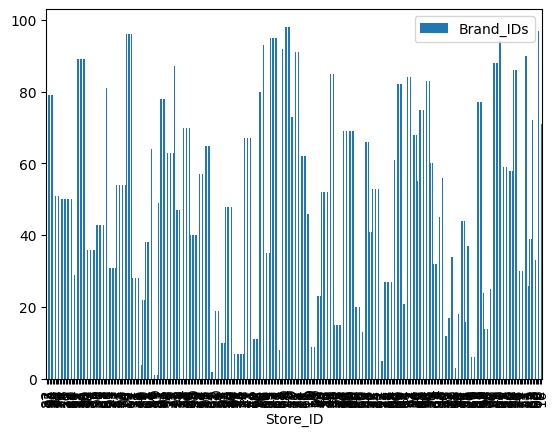

In [48]:
# crate heatmap


data_dummy.plot(x='Store_ID', y='Brand_IDs', kind='bar')

<Axes: >

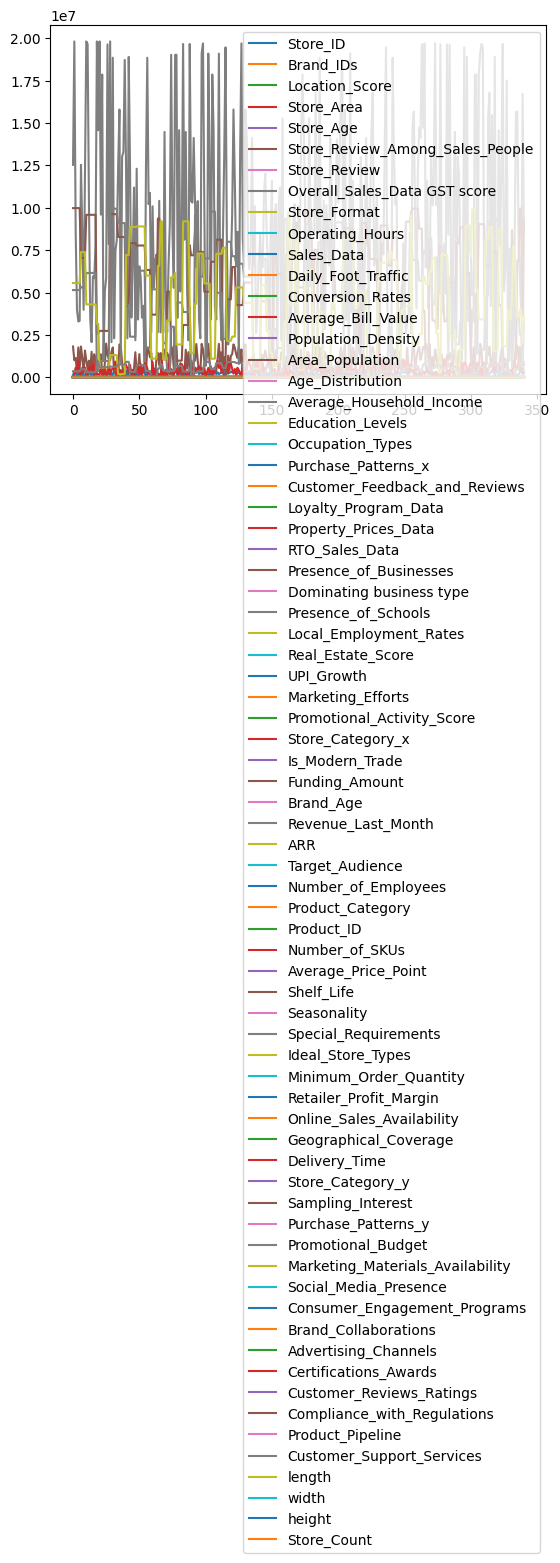

In [49]:
data_dummy.plot()

In [72]:
data_dummy['Loyalty_Program_Data'] = data_dummy['Loyalty_Program_Data'].astype(int)
data_dummy['Is_Modern_Trade'] = data_dummy['Is_Modern_Trade'].astype(int)

In [73]:
data_dummy.mean()

Store_ID                       48.642229
Brand_IDs                      50.800587
Location_Score                  2.783075
Store_Area                   2781.674487
Store_Age                      11.862170
                                ...     
Customer_Support_Services       1.046921
length                         51.038123
width                          51.507331
height                         53.730205
Store_Count                     3.973607
Length: 74, dtype: float64

In [ ]:
information_ids_num , information_ids_str

In [ ]:
def create_threshold(data):
    features = ['Location_Score', 'Sales_Data','Store_Age','Store_Review']
    

In [153]:
X.head() 

,Store_ID,Brand_IDs,Location_Score,Store_Area,Store_Age,Store_Review_Among_Sales_People,Store_Review,Overall_Sales_Data GST score,Store_Format,Operating_Hours,...,Brand_Collaborations,Advertising_Channels,Certifications_Awards,Customer_Reviews_Ratings,Compliance_with_Regulations,Product_Pipeline,Customer_Support_Services,length,width,height
0,82,79,4.380783,2071,13,4.614771,4.611630,2,0,20,...,0,1,2,3.954743,0,1,0,85.0,59.0,96.0
1,37,79,1.041124,4330,20,1.702907,1.312858,3,1,13,...,0,1,2,3.954743,0,1,0,85.0,59.0,96.0
2,95,79,3.801751,3739,1,3.348931,4.818411,4,1,19,...,0,1,2,3.954743,0,1,0,85.0,59.0,96.0
3,44,79,2.191860,3813,17,1.110293,3.192973,2,0,14,...,0,1,2,3.954743,0,1,0,85.0,59.0,96.0
4,94,79,2.635669,2699,14,4.981856,1.400239,2,1,23,...,0,1,2,3.954743,0,1,0,85.0,59.0,96.0


In [154]:
y.head()

0    2
1    5
2    5
3    5
4    3
Name: Store_Count, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
X_train.shape, X_test.shape, y_test.shape

((272, 73), (69, 73), (69,))

In [155]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [156]:
y_pred = gbr.predict(X_test)


In [157]:
y_pred

array([2.24473244, 4.24620526, 4.31745695, 3.23073557, 4.05054885,
       3.81069778, 4.29606643, 4.86112965, 2.94649635, 2.28873182,
       4.89781296, 4.07113463, 4.87103372, 4.00293401, 4.72762372,
       3.78642274, 3.76537366, 3.06362596, 3.83756126, 4.88283159,
       4.55950436, 5.00256604, 3.07766795, 4.59958054, 4.8216173 ,
       2.40947051, 4.84056863, 4.99440771, 3.80126116, 3.80991253,
       2.28955339, 2.56711499, 4.88630004, 3.99298664, 3.0057255 ,
       3.1784511 , 5.01506764, 4.98980134, 4.77593401, 3.00693198,
       4.37984796, 4.83317161, 2.29601347, 4.84911713, 4.04502097,
       4.64837392, 4.84911713, 3.91668174, 3.14315945, 3.0872388 ,
       3.78661798, 3.17545914, 2.14231696, 2.1218726 , 4.84863535,
       3.87466184, 4.10143723, 4.8829393 , 4.94875771, 4.89837672,
       3.32014704, 4.95278529, 3.11202154, 4.82178515, 4.85763359,
       4.71164878, 4.30108354, 3.22869978, 4.87435615])

In [81]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.424726148071488

In [82]:
test_value = X_test.head(1)

In [160]:
y_pred

array([3.03648331, 3.89294876, 2.77329396, 3.09841623, 5.85833947,
       5.64985333, 3.06603434, 2.36267315, 2.16982096, 7.84961166,
       5.87440745, 5.64985333, 3.09939921, 2.98909994, 4.9388194 ,
       3.12538401, 3.94074187, 3.11209834, 4.94649563, 4.00185859,
       5.49661525, 3.93883393, 3.00192352, 3.9814371 , 3.77134099,
       3.22341674, 4.90470973, 5.02559896, 5.84415781, 2.96334666,
       4.0438227 , 5.98923401, 4.04852504, 3.93963607, 4.64383929,
       5.93951896, 7.8590127 , 3.39006241, 4.9388194 , 3.11694669,
       4.83248841, 5.94192562, 5.49661525, 5.99460055, 4.21217218,
       6.01412723, 3.90790372, 2.41479478, 2.91767151, 5.98272924,
       2.91972736, 3.13818993, 3.12186824, 4.74288465, 4.88698438,
       5.49661525, 3.92352427, 2.39329786, 3.1012127 , 4.82291784,
       3.1213983 , 4.80616811, 3.804044  , 5.98365083, 5.02456364,
       2.96687344, 3.0447469 , 7.97323186, 2.60418335])

In [83]:
X_train.iloc[0]

Store_ID                       69.000000
Brand_IDs                       2.000000
Location_Score                  1.300137
Store_Area                   2612.000000
Store_Age                      16.000000
                                ...     
Product_Pipeline                0.000000
Customer_Support_Services       0.000000
length                         45.000000
width                          27.000000
height                         13.000000
Name: 114, Length: 73, dtype: float64

In [84]:
gbr.predict(X_train.iloc[0].values.reshape(1, -1))

/Users/anshumantiwari/Documents/code/work/Baylink/baylink-ml/.conda/lib/python3.12/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([3.10501196])

In [ ]:
information_ids_str

In [86]:
X_train.head(1)

,Store_ID,Brand_IDs,Location_Score,Store_Area,Store_Age,Store_Review_Among_Sales_People,Store_Review,Overall_Sales_Data GST score,Store_Format,Operating_Hours,...,Brand_Collaborations,Advertising_Channels,Certifications_Awards,Customer_Reviews_Ratings,Compliance_with_Regulations,Product_Pipeline,Customer_Support_Services,length,width,height
114,69,2,1.300137,2612,16,3.803382,2.619783,0,1,9,...,0,0,0,1.318263,0,0,0,45.0,27.0,13.0


In [162]:
brand_details = {
            'Funding_Amount': 12000000,
            'Brand_Age': 24,
            'Revenue_Last_Month': 40000,
            'ARR': 10000,
            'Number_of_Employees': 1000,
            'Headquarters_Location': 23,
            'Product_Category': 3,
            'Product_Sub_Category': 10,
            'Average_Price_Point': 243,
            'Shelf_Life': 3, 
            'Special_Requirements': 0,
            'Ideal_Store_Types': 0,
            'Minimum_Order_Quantity': 12,
            'Retailer_Profit_Margin': 33.3,
            'Online_Sales_Availability': 1,
            'Geographical_Coverage': 2,
            'Delivery_Time': 17,
            'Purchase_Patterns_x': 0,
            'Sampling_Interest': 0,
            'Purchase_Patterns_y': 0,
            'Promotional_Budget': 1245,
            'Marketing_Materials_Availability': 1,
            'Social_Media_Presence': 1,
            'Consumer_Engagement_Programs': 1,
            'Brand_Collaborations': 1,
            'Advertising_Channels': 1,
            'Certifications_Awards': 1,
            'Customer_Reviews_Ratings': 1.7,
            'Compliance_with_Regulations': 1,
            'length' : 32,
            'width' : 14,
            'height' : 46
        }

x_test_value = pd.DataFrame(brand_details, index=[0])

#gbr.predict(x_test_value)

In [ ]:
'''store_counts = data.groupby('Store_ID')['Brand_ID'].nunique().reset_index()
store_counts.columns = ['Store_ID', 'Store_Count']

store_counts'''

In [113]:
data.head()

,Store_ID,Brand_IDs,Location_Score,Store_Area,Store_Age,Store_Review_Among_Sales_People,Store_Review,Overall_Sales_Data GST score,Store_Format,Operating_Hours,...,Brand_Collaborations,Advertising_Channels,Certifications_Awards,Customer_Reviews_Ratings,Compliance_with_Regulations,Product_Pipeline,Customer_Support_Services,length,width,height
0,127,4,2.843787,2783,9,2.059763,1.492048,2,0,19,...,False,2,0,1.306872,True,0,2,68.0,35.0,51.0
1,127,3,2.843787,2783,9,2.059763,1.492048,2,0,19,...,True,1,2,0.975622,True,1,0,5.0,71.0,79.0
2,127,1,2.843787,2783,9,2.059763,1.492048,2,0,19,...,True,0,1,0.227285,True,0,2,24.0,86.0,82.0
3,127,2,2.843787,2783,9,2.059763,1.492048,2,0,19,...,False,1,0,1.915238,False,0,1,96.0,62.0,45.0
4,57,3,1.414279,1223,5,4.131086,3.094165,2,0,12,...,True,1,2,0.975622,True,1,0,5.0,71.0,79.0


In [114]:
combined_data = data.to_excel('combined_data_new.xlsx')

In [117]:
combined_data = pd.read_excel('combined_data_new.xlsx')

In [49]:
combined_data['Store_ID'] = le.fit_transform(combined_data['Store_ID'])

,Store_ID,Brand_IDs,Location_Score,Store_Area,Store_Age,Store_Review_Among_Sales_People,Store_Review,Overall_Sales_Data GST score,Store_Format,Operating_Hours,...,Brand_Collaborations,Advertising_Channels,Certifications_Awards,Customer_Reviews_Ratings,Compliance_with_Regulations,Product_Pipeline,Customer_Support_Services,length,width,height
0,cf237471-0781-48dc-9082-0892d90144cf,d17ff46c-f958-43e3-aefe-6149fb84ac30,4.380783,2071,13,4.614771,4.611630,2,0,20,...,0,1,2,3.954743,0,1,0,85,59,96
1,63143b60-8650-4472-9db4-28ddf9f52cd9,d17ff46c-f958-43e3-aefe-6149fb84ac30,1.041124,4330,20,1.702907,1.312858,3,1,13,...,0,1,2,3.954743,0,1,0,85,59,96
2,f2c6a624-2f9c-43b5-9dd7-3bc531152998,d17ff46c-f958-43e3-aefe-6149fb84ac30,3.801751,3739,1,3.348931,4.818411,4,1,19,...,0,1,2,3.954743,0,1,0,85,59,96
3,74f1dd03-75aa-476a-a980-95e91a95617d,d17ff46c-f958-43e3-aefe-6149fb84ac30,2.191860,3813,17,1.110293,3.192973,2,0,14,...,0,1,2,3.954743,0,1,0,85,59,96
4,f2c518c4-0f48-434a-aee2-dd6d1593d80c,d17ff46c-f958-43e3-aefe-6149fb84ac30,2.635669,2699,14,4.981856,1.400239,2,1,23,...,0,1,2,3.954743,0,1,0,85,59,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,c8adac95-a6b6-4874-b447-eb8850c56c45,55bb502c-2e10-4eab-8f95-a3d45df37919,1.520054,4509,11,3.820329,3.731840,5,1,17,...,1,1,1,0.073404,1,0,1,93,86,38
337,9012763b-16f2-4525-91a6-8d460b97db90,f852ad95-cdca-4a77-a911-f7c0419653cb,4.634358,1846,5,0.576449,1.377139,5,0,24,...,0,1,2,0.912553,0,0,2,10,43,62
338,aa924292-b1cd-4008-97eb-b89c22b56bac,f852ad95-cdca-4a77-a911-f7c0419653cb,4.551238,1654,16,1.114964,1.233445,5,1,10,...,0,1,2,0.912553,0,0,2,10,43,62
339,0a253e59-c6ca-461a-accd-250e75278fa0,5fa8a652-157e-4073-9384-1ff64415c1e0,2.200245,4105,19,4.019526,4.696772,0,0,8,...,1,1,1,1.312669,1,0,2,89,76,23


In [51]:
information_ids_str = {
    'Store_ID' : combined_data['Store_ID'],
    'Brand_IDs' : combined_data['Brand_IDs'],
    'Product_ID' : combined_data['Product_ID'],
    'Brand_ID' : combined_data['Brand_ID'],
}

In [52]:

information_ids_num = {
    'Store_ID' : combined_data['Store_ID'],
    'Brand_IDs' : combined_data['Brand_IDs'],
    'Product_ID' : combined_data['Product_ID'],
    'Brand_ID' : combined_data['Brand_ID'],
}

In [53]:
combined_data['Store_ID'] = le.fit_transform(combined_data['Store_ID'])
combined_data['Brand_IDs'] = le.fit_transform(combined_data['Brand_IDs'])
combined_data['Product_ID'] = le.fit_transform(combined_data['Product_ID'])
combined_data['Brand_ID'] = le.fit_transform(combined_data['Brand_ID'])

In [179]:
data.head()

,Store_ID,Brand_IDs,Location_Score,Store_Area,Store_Age,Store_Review_Among_Sales_People,Store_Review,Overall_Sales_Data GST score,Store_Format,Operating_Hours,...,Certifications_Awards,Company_Website,Customer_Reviews_Ratings,Compliance_with_Regulations,Product_Pipeline,Customer_Support_Services,mapping_score,length,width,height
0,72,3,1.997831,2977,1,0.292241,2.218141,4,0,22,...,1,https://estrada.com/,1.944301,1,1,1,83,65.0,37.0,57.0
1,72,2,1.997831,2977,1,0.292241,2.218141,4,0,22,...,1,https://smith.net/,1.097019,0,0,0,52,21.0,59.0,76.0
2,72,0,1.997831,2977,1,0.292241,2.218141,4,0,22,...,1,http://grant-bradley.biz/,0.715907,1,0,0,42,7.0,33.0,46.0
3,72,1,1.997831,2977,1,0.292241,2.218141,4,0,22,...,1,http://www.lambert.info/,2.466009,0,1,0,43,8.0,48.0,60.0
4,72,5,1.997831,2977,1,0.292241,2.218141,4,0,22,...,1,https://harris.com/,0.772416,0,1,0,63,36.0,42.0,48.0


In [180]:
data.to_excel('combined_data_new_withmapp.xlsx')

In [181]:
store_counts = data.groupby('Brand_IDs')['Store_ID'].nunique().reset_index()

In [182]:
data['Store_ID'].unique().shape , data['Brand_IDs'].unique().shape

((200,), (6,))

In [183]:
store_counts

,Brand_IDs,Store_ID
0,0,200
1,1,200
2,2,200
3,3,200
4,4,200
5,5,200


In [186]:
threshol_data = data[data['mapping_score'] > 60]

In [189]:
store_counts_threshold = threshol_data.groupby('Brand_IDs')['Store_ID'].nunique().reset_index()

In [195]:
store_counts_threshold.head()

,Brand_IDs,Store_Count
0,0,88
1,1,71
2,2,90
3,3,82
4,4,84


In [196]:
store_counts_threshold.columns = ['Brand_IDs', 'Store_Count']

In [199]:
data.head(5)

,Store_ID,Brand_IDs,Location_Score,Store_Area,Store_Age,Store_Review_Among_Sales_People,Store_Review,Overall_Sales_Data GST score,Store_Format,Operating_Hours,...,Advertising_Channels,Certifications_Awards,Customer_Reviews_Ratings,Compliance_with_Regulations,Product_Pipeline,Customer_Support_Services,mapping_score,length,width,height
0,72,3,1.997831,2977,1,0.292241,2.218141,4,0,22,...,1,1,1.944301,1,1,1,83,65.0,37.0,57.0
1,72,2,1.997831,2977,1,0.292241,2.218141,4,0,22,...,1,1,1.097019,0,0,0,52,21.0,59.0,76.0
2,72,0,1.997831,2977,1,0.292241,2.218141,4,0,22,...,1,1,0.715907,1,0,0,42,7.0,33.0,46.0
3,72,1,1.997831,2977,1,0.292241,2.218141,4,0,22,...,0,1,2.466009,0,1,0,43,8.0,48.0,60.0
4,72,5,1.997831,2977,1,0.292241,2.218141,4,0,22,...,2,1,0.772416,0,1,0,63,36.0,42.0,48.0


In [200]:
threshol_data['Store_ID'].unique().shape  

(196,)

In [198]:
threshol_data.head(5)

,Store_ID,Brand_IDs,Location_Score,Store_Area,Store_Age,Store_Review_Among_Sales_People,Store_Review,Overall_Sales_Data GST score,Store_Format,Operating_Hours,...,Advertising_Channels,Certifications_Awards,Customer_Reviews_Ratings,Compliance_with_Regulations,Product_Pipeline,Customer_Support_Services,mapping_score,length,width,height
0,72,3,1.997831,2977,1,0.292241,2.218141,4,0,22,...,1,1,1.944301,1,1,1,83,65.0,37.0,57.0
4,72,5,1.997831,2977,1,0.292241,2.218141,4,0,22,...,2,1,0.772416,0,1,0,63,36.0,42.0,48.0
11,157,4,2.610919,4253,18,1.655820,4.854113,0,1,20,...,2,0,3.635609,0,1,1,90,44.0,9.0,29.0
14,19,0,4.768704,2638,10,2.237801,3.665959,5,1,18,...,1,1,0.715907,1,0,0,88,7.0,33.0,46.0
15,19,1,4.768704,2638,10,2.237801,3.665959,5,1,18,...,0,1,2.466009,0,1,0,76,8.0,48.0,60.0


In [ ]:
drop_columns=['Bestselling_Products','Company_Website','Product_Dimensions','Brand_ID']

data = data.drop(drop_columns, axis=1)
threshol_data = threshol_data.drop(drop_columns, axis=1)

In [265]:
threshol_data.drop('Brand_ID',axis=1,inplace=True)

In [213]:
brand_details = {
            'Funding_Amount': 12000000,
            'Brand_Age': 24,
            'Revenue_Last_Month': 40000,
            'ARR': 10000,
            'Number_of_Employees': 1000,
            'Headquarters_Location': 23,
            'Product_Category': 3,
            'Product_Sub_Category': 10,
            'Average_Price_Point': 243,
            'Shelf_Life': 3, 
            'Special_Requirements': 0,
            'Ideal_Store_Types': 0,
            'Minimum_Order_Quantity': 12,
            'Retailer_Profit_Margin': 33.3,
            'Online_Sales_Availability': 1,
            'Geographical_Coverage': 2,
            'Delivery_Time': 17,
            'Purchase_Patterns_x': 0,
            'Sampling_Interest': 0,
            'Purchase_Patterns_y': 0,
            'Promotional_Budget': 1245,
            'Marketing_Materials_Availability': 1,
            'Social_Media_Presence': 1,
            'Consumer_Engagement_Programs': 1,
            'Brand_Collaborations': 1,
            'Advertising_Channels': 1,
            'Certifications_Awards': 1,
            'Customer_Reviews_Ratings': 1.7,
            'Compliance_with_Regulations': 1,
            'length' : 32,
            'width' : 14,
            'height' : 46
        }

In [266]:
data.drop('Brand_ID',axis=1,inplace=True)

In [267]:
data.head()

,Store_ID,Brand_IDs,Location_Score,Store_Area,Store_Age,Store_Review_Among_Sales_People,Store_Review,Overall_Sales_Data GST score,Store_Format,Operating_Hours,...,Advertising_Channels,Certifications_Awards,Customer_Reviews_Ratings,Compliance_with_Regulations,Product_Pipeline,Customer_Support_Services,mapping_score,length,width,height
0,72,3,1.997831,2977,1,0.292241,2.218141,4,0,22,...,1,1,1.944301,1,1,1,83,65.0,37.0,57.0
1,72,2,1.997831,2977,1,0.292241,2.218141,4,0,22,...,1,1,1.097019,0,0,0,52,21.0,59.0,76.0
2,72,0,1.997831,2977,1,0.292241,2.218141,4,0,22,...,1,1,0.715907,1,0,0,42,7.0,33.0,46.0
3,72,1,1.997831,2977,1,0.292241,2.218141,4,0,22,...,0,1,2.466009,0,1,0,43,8.0,48.0,60.0
4,72,5,1.997831,2977,1,0.292241,2.218141,4,0,22,...,2,1,0.772416,0,1,0,63,36.0,42.0,48.0


In [270]:
data.to_excel("latest.xlsx")

In [271]:
X = data.drop('mapping_score', axis=1)
y = data['mapping_score']

In [272]:
from sklearn.model_selection import train_test_split

In [273]:
X_train , x_test_value , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [274]:
from sklearn.ensemble import GradientBoostingClassifier

In [275]:
gbr = GradientBoostingClassifier()

gbr.fit(X_train, y_train)

GradientBoostingClassifier()

In [276]:
y_test_pred = gbr.predict(x_test_value)

In [277]:
y_test_pred

array([ 38,  51,  24,   0,  81, 100,  90,  44,  76,   5,  24,  63,  82,
        79,  35,  88,  72,   4,  83,  74,  38,  44,  76,   2,  66,  23,
        76,  95,  28,  19,   8,  18,  96,  45,  79,  19,  70,  15,  15,
        24,  50,  88,  96,  72,  88,  25,  28,  37,  36,  72,  55,   4,
         8,  92,  86,  24,  54,   2,  73,  18,   9,  39,  14, 100,  11,
        78,  72,  80,  35,  39,  84,  24,  87,  82,  45,  70,  22,  82,
        90,  79,  54,  85,  51,  79,  63,  46,  90,  39,  99,  32,  72,
        43,  45,  45,   7,  99,  41,  63,  79,  72,  94,  76,   8,  45,
        64,  74,  44,  63,  65,  90,  76,  98,  97,  34,  91,  71,  99,
        97,  26,  70,   2,  11,   7,  90,  25,  94,  15,  32,  33,  31,
        87,  96,  90,  17,  92,  39,  15,  24,  31,  23,  72,  80,  30,
        74,  33,  10,  90,  34,  19,  99,  93,  29,  53,  76,  46,  20,
        15,  85,   7,   9,  50,  23,  99,  71,  19,  35,  86,  96,  24,
        61,   4,  31,  15,  45,  46,  67,  39,  72,  71,  78,  5

In [278]:
s = 0
for i in y_test_pred:
    if i > 80:
        s +=1 

print(s)

54


In [279]:
brand_cols = brand_details.keys()

In [280]:
brand_cols

dict_keys(['Funding_Amount', 'Brand_Age', 'Revenue_Last_Month', 'ARR', 'Number_of_Employees', 'Headquarters_Location', 'Product_Category', 'Product_Sub_Category', 'Average_Price_Point', 'Shelf_Life', 'Special_Requirements', 'Ideal_Store_Types', 'Minimum_Order_Quantity', 'Retailer_Profit_Margin', 'Online_Sales_Availability', 'Geographical_Coverage', 'Delivery_Time', 'Purchase_Patterns_x', 'Sampling_Interest', 'Purchase_Patterns_y', 'Promotional_Budget', 'Marketing_Materials_Availability', 'Social_Media_Presence', 'Consumer_Engagement_Programs', 'Brand_Collaborations', 'Advertising_Channels', 'Certifications_Awards', 'Customer_Reviews_Ratings', 'Compliance_with_Regulations', 'length', 'width', 'height'])

In [281]:
retailer_col = []

for col in threshol_data.columns:
    if col not in brand_cols:
        retailer_col.append(col)

In [282]:
retailer_col

['Store_ID',
 'Brand_IDs',
 'Location_Score',
 'Store_Area',
 'Store_Age',
 'Store_Review_Among_Sales_People',
 'Store_Review',
 'Overall_Sales_Data GST score',
 'Store_Format',
 'Operating_Hours',
 'Sales_Data',
 'Daily_Foot_Traffic',
 'Conversion_Rates',
 'Average_Bill_Value',
 'Population_Density',
 'Area_Population',
 'Age_Distribution',
 'Average_Household_Income',
 'Education_Levels',
 'Occupation_Types',
 'Customer_Feedback_and_Reviews',
 'Loyalty_Program_Data',
 'Property_Prices_Data',
 'RTO_Sales_Data',
 'Presence_of_Businesses',
 'Dominating business type',
 'Presence_of_Schools',
 'Local_Employment_Rates',
 'Real_Estate_Score',
 'UPI_Growth',
 'Marketing_Efforts',
 'Promotional_Activity_Score',
 'Store_Category_x',
 'Is_Modern_Trade',
 'Target_Audience',
 'Product_ID',
 'Number_of_SKUs',
 'Seasonality',
 'Store_Category_y',
 'Product_Pipeline',
 'Customer_Support_Services',
 'mapping_score']

In [283]:
retailer_threshold_data = threshol_data[retailer_col]

In [284]:
retailer_threshold_data_unique = retailer_threshold_data.groupby('Store_ID').nunique().reset_index()

In [285]:
brand_details_df = pd.DataFrame(brand_details, index=[0])

In [286]:
brand_details_df

,Funding_Amount,Brand_Age,Revenue_Last_Month,ARR,Number_of_Employees,Headquarters_Location,Product_Category,Product_Sub_Category,Average_Price_Point,Shelf_Life,...,Social_Media_Presence,Consumer_Engagement_Programs,Brand_Collaborations,Advertising_Channels,Certifications_Awards,Customer_Reviews_Ratings,Compliance_with_Regulations,length,width,height
0,12000000,24,40000,10000,1000,23,3,10,243,3,...,1,1,1,1,1,1.7,1,32,14,46


In [287]:
retailer_threshold_data_unique

,Store_ID,Brand_IDs,Location_Score,Store_Area,Store_Age,Store_Review_Among_Sales_People,Store_Review,Overall_Sales_Data GST score,Store_Format,Operating_Hours,...,Store_Category_x,Is_Modern_Trade,Target_Audience,Product_ID,Number_of_SKUs,Seasonality,Store_Category_y,Product_Pipeline,Customer_Support_Services,mapping_score
0,0,5,1,1,1,1,1,1,1,1,...,1,1,3,5,5,2,2,2,2,5
1,1,4,1,1,1,1,1,1,1,1,...,1,1,2,4,4,2,2,2,2,3
2,2,3,1,1,1,1,1,1,1,1,...,1,1,3,3,3,2,2,2,1,3
3,3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,4,3,1,1,1,1,1,1,1,1,...,1,1,2,3,3,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,195,2,1,1,1,1,1,1,1,1,...,1,1,2,2,2,2,2,2,1,2
192,196,2,1,1,1,1,1,1,1,1,...,1,1,2,2,2,1,2,2,2,2
193,197,3,1,1,1,1,1,1,1,1,...,1,1,2,3,3,2,2,2,1,3
194,198,3,1,1,1,1,1,1,1,1,...,1,1,3,3,3,2,2,2,2,3


In [293]:
df1_replicated = pd.concat([brand_details_df]*len(retailer_threshold_data_unique), ignore_index=True)
 
df1_replicated

,Funding_Amount,Brand_Age,Revenue_Last_Month,ARR,Number_of_Employees,Headquarters_Location,Product_Category,Product_Sub_Category,Average_Price_Point,Shelf_Life,...,Social_Media_Presence,Consumer_Engagement_Programs,Brand_Collaborations,Advertising_Channels,Certifications_Awards,Customer_Reviews_Ratings,Compliance_with_Regulations,length,width,height
0,12000000,24,40000,10000,1000,23,3,10,243,3,...,1,1,1,1,1,1.7,1,32,14,46
1,12000000,24,40000,10000,1000,23,3,10,243,3,...,1,1,1,1,1,1.7,1,32,14,46
2,12000000,24,40000,10000,1000,23,3,10,243,3,...,1,1,1,1,1,1.7,1,32,14,46
3,12000000,24,40000,10000,1000,23,3,10,243,3,...,1,1,1,1,1,1.7,1,32,14,46
4,12000000,24,40000,10000,1000,23,3,10,243,3,...,1,1,1,1,1,1.7,1,32,14,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,12000000,24,40000,10000,1000,23,3,10,243,3,...,1,1,1,1,1,1.7,1,32,14,46
192,12000000,24,40000,10000,1000,23,3,10,243,3,...,1,1,1,1,1,1.7,1,32,14,46
193,12000000,24,40000,10000,1000,23,3,10,243,3,...,1,1,1,1,1,1.7,1,32,14,46
194,12000000,24,40000,10000,1000,23,3,10,243,3,...,1,1,1,1,1,1.7,1,32,14,46


In [294]:
input_brand = pd.concat([df1_replicated, retailer_threshold_data_unique], axis=1)

In [297]:
input_brand.drop('mapping_score', axis=1, inplace=True)

In [312]:
input_brand = input_brand[x_test_value.columns]

In [313]:
gbr.predict(input_brand)

array([19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19])